# Titanic: Machine Learning from Disaster

**Data analysis using Machine Learning to predict the victims and survivors of the Titanic accident.**

## The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered *unsinkable* RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in **surviving**, it seems some groups of people were more likely to survive than others.

In this **challenge**, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

 ### First of all 
 
 Import the necessary libraries to start our data analysis.
 * Using Pandas to analyze the data,
 * Seaborn and Matplotlib to view the data
 * Scikit-Learn to create the machine learning model

In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Split the data

I start the analysis by segmenting the data, creating a training and a test dataset, you can start by analyzing the dataset before the division, but as the goal is to create a machine learning model, I already know that it will be necessary to divide the dataset, so I already do this step at the beginning of this project.

In [2]:
train = pd.read_csv('Datasets/Titanic/train.csv')
test = pd.read_csv('Datasets/Titanic/test.csv')

I use the head command to check the first five rows to the dataset

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


and I use the sample command to check random five rows in the same dataset

In [4]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
411,412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q


This process of checking rows in the dataset serves to understand their contents, it is also advisable to use commands like "info" to understand the variables of the dataset

### Heat Map

Another analysis that we can do is the correlation analysis, we can do this graphically using a heat map to illustrate the positive and negative correlations.
Note: Correlation does not mean causality, so it is not because a variable has a strong positive correlation with another variable that it is necessarily responsible for it.

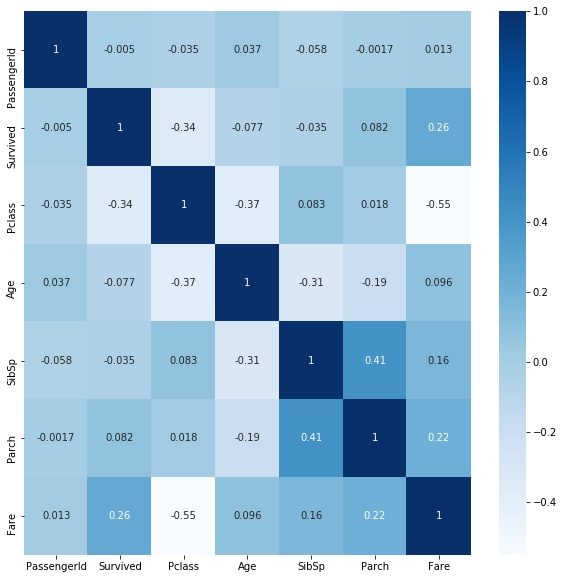

In [5]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, cmap='Blues')

### Drop data

Just as some variables have **positive** and **negative** correlations, there are variables that are **insignificant** to answer our business problem, for example the name of the *ship's passengers*. Such information that is irrelevant can (and should) be removed from the **dataset** to facilitate the creation of an effective model.
Note: This process depends exclusively on the problem being treated, being necessary to study the dataset and the question to be answered, before deciding to remove any data. Decisions like this can make your Machine Learning model effective or not.

In [6]:
train.drop(['Name','Ticket', 'Cabin' ],axis=1, inplace = True)
test.drop(['Name','Ticket', 'Cabin' ],axis=1, inplace = True)

### One Hot Encoding

In this step of the analysis I decide to transform the categorical variables using one hot encoding so that the ML algorithm (which in this case is a **decision tree algorithm**) can work better.

In [7]:
new_data_train = pd.get_dummies(train)
new_data_test = pd.get_dummies(test)

Again I evaluate my dataset with the transformations made.

In [8]:
new_data_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [9]:
new_data_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


### Null

Another factor that can negatively impact the ML model is the **null data** present in the dataset. There are several ways to deal with this issue, some data can simply be deleted, others we can use the media to fill in, this decision is part of the **job** of the *data scientist*.

In [10]:
new_data_train.isnull().sum().sort_values(ascending=False).head(10)

Age           177
Embarked_S      0
Embarked_Q      0
Embarked_C      0
Sex_male        0
Sex_female      0
Fare            0
Parch           0
SibSp           0
Pclass          0
dtype: int64

As you can see in the command above, there are several cases of null variables in the Age column, as it is a continuous quantitative field, I decide to fill in the average.

In [11]:
new_data_test['Age'].fillna(new_data_test['Age'].mean(), inplace=True)
new_data_train['Age'].fillna(new_data_train['Age'].mean(), inplace=True)

Evaluating the dataset again, I still find a column with null data (in this case the Fare column) and because it is just a row I also choose to simply fill in the average.

In [12]:
new_data_test.isnull().sum().sort_values(ascending=False).head(10)

Fare          1
Embarked_S    0
Embarked_Q    0
Embarked_C    0
Sex_male      0
Sex_female    0
Parch         0
SibSp         0
Age           0
Pclass        0
dtype: int64

In [13]:
new_data_test['Fare'].fillna(new_data_test['Fare'].mean(), inplace=True)
new_data_train['Fare'].fillna(new_data_train['Fare'].mean(), inplace=True)

So far everything that has been done is about data analysis, modeling and cleaning, at this moment I start to create the ML model to predict the survived list, so, I drop the column *Survided* from my train dataset and create a new dataset with only the **Survived list**.

In [14]:
x = new_data_train.drop('Survived', axis = 1)
y = new_data_train['Survived']

### The Machine Learning Algorithm

Finally, with the data modeling conclude, I apply the **Decision Tree Algorithm** for the classify problem. I chose use "max_depth = 3" because in comparision with others tests that I make, the result is more acurate.

In [15]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

After apply the algorithm I use the score command to show the results. In this case the model has get 82% of accuracy to predict the Survived List of the Titanic crash accident

In [16]:
tree.score(x,y)

0.8271604938271605

In the final part to this Kaggle's challenge I prepare the results to submit in there's platform.

In [17]:
submission = pd.DataFrame()
submission['PassengerId'] = new_data_test['PassengerId']
submission['Survived'] = tree.predict(new_data_test)

I save the result in a csv file and then I check the results of predict model

In [18]:
submission.to_csv('submission.csv', index=False)

In [19]:
result = pd.read_csv('submission.csv')

In [20]:
result.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


So, this is my version of the Titanic's Challenge, feel comfortable to use the code for your own analysis and for to learning more about Machine Learning and Data Analysis process.